In [18]:
import numpy as np
import pandas as pd

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [33]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [34]:
y.shape

(70000,)

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
some_digit = X[0]

In [39]:
some_digit_image = some_digit.reshape(28,28)

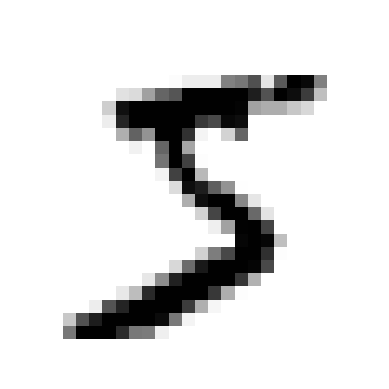

In [45]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [46]:
y[0]

'5'

In [47]:
y = y.astype(np.uint8)

In [48]:
y[0]

5

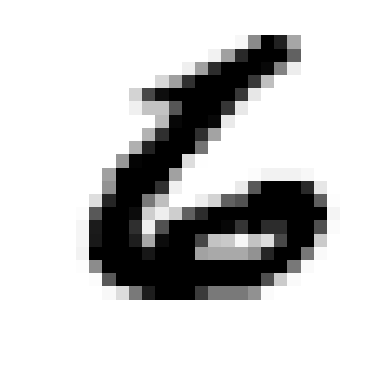

In [54]:
plt.imshow(X[69999].reshape(28,28), cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [56]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)  

In [57]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [59]:
sgd_clf.predict([some_digit])

array([ True])

In [61]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [67]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [69]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [70]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [71]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [72]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [73]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [74]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [75]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [76]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")